In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data source: Kaggle

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

#### Today we're gonna do analysis for bank marketing campaign. Our main objective is to find the solution for effective marketing campaign in banking industries. Let's see our data.

In [3]:
df= pd.read_csv('bank.csv')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


We have 17 columns and 11162 rows to analyze the data. For each columns there is information to understand the parameters and variables.

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - balance: balance od the customer

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#### My strategy for this analysis is visualize the data by each columns to understands customer characteristics that affect the deposit as a target. So let's see the null value for each columns.

In [31]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### There's no null values for each columns, so we can do EDA with seaborn and matplotlib.

In [32]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

#### We count the amount of yes to deposit and no to deposit as a target for campaign effectiveness. We can see it's relatively balance number but we have to breakdown each customer who willing to deposit or not.

## Let's visualize it

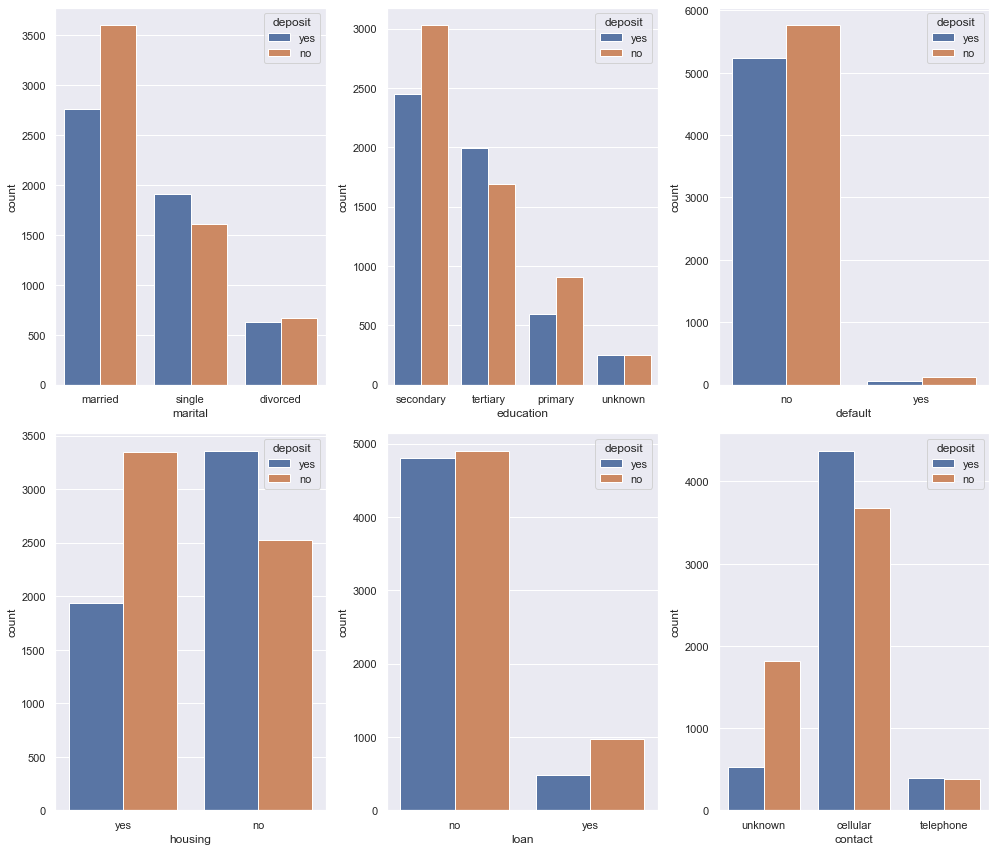

In [11]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(2, 3, figsize=(14, 12))

sns.countplot(data=df, x='marital', hue='deposit',ax=ax[0][0])
sns.countplot(data=df, x='education', hue='deposit', ax=ax[0][1])
sns.countplot(data=df, x='default', hue='deposit', ax=ax[0][2])
sns.countplot(data=df, x='housing', hue='deposit', ax=ax[1][0])
sns.countplot(data=df, x='loan', hue='deposit', ax=ax[1][1])
sns.countplot(data=df, x='contact', hue='deposit', ax=ax[1][2])
plt.tight_layout()
plt.show()

#### To acknowledge the effectiveness of this campaign we count the conversion rate is the sum of yes to deposit divide by sum of no to deposit. When the number less than one it means the effectiveness is low. When the number around one it means effectivenss is okay and above one is really effective.

In [54]:
married_yes=df.loc[((df['marital']=='married') & (df['deposit']=='yes'))]
married_no=df.loc[((df['marital']=='married') & (df['deposit']=='no'))]
print('Married Conversion Rate:',married_yes['deposit'].replace('yes',1).sum()/married_no['deposit'].replace('no',1).sum())

single_yes=df.loc[((df['marital']=='single') & (df['deposit']=='yes'))]
single_no=df.loc[((df['marital']=='single') & (df['deposit']=='no'))]
print('Single Conversion Rate:',single_yes['deposit'].replace('yes',1).sum()/single_no['deposit'].replace('no',1).sum())

divorced_yes=df.loc[((df['marital']=='divorced') & (df['deposit']=='yes'))]
divorced_no=df.loc[((df['marital']=='divorced') & (df['deposit']=='no'))]
print('Divorced Conversion Rate:',divorced_yes['deposit'].replace('yes',1).sum()/divorced_no['deposit'].replace('no',1).sum())

Married Conversion Rate: 0.7661290322580645
Single Conversion Rate: 1.190535491905355
Divorced Conversion Rate: 0.9269746646795827


In [76]:
secondary_yes=df.loc[((df['education']=='secondary') & (df['deposit']=='yes'))]
secondary_no=df.loc[((df['education']=='secondary') & (df['deposit']=='no'))]
print('Secondary Education Conversion Rate:',secondary_yes['deposit'].replace('yes',1).sum()/secondary_no['deposit'].replace('no',1).sum())

tertiary_yes=df.loc[((df['education']=='tertiary') & (df['deposit']=='yes'))]
tertiary_no=df.loc[((df['education']=='tertiary') & (df['deposit']=='no'))]
print('Tertiary Education Conversion Rate:',tertiary_yes['deposit'].replace('yes',1).sum()/tertiary_no['deposit'].replace('no',1).sum())

primary_yes=df.loc[((df['education']=='primary') & (df['deposit']=='yes'))]
primary_no=df.loc[((df['education']=='primary') & (df['deposit']=='no'))]
print('Primary Education Conversion Rate:',primary_yes['deposit'].replace('yes',1).sum()/primary_no['deposit'].replace('no',1).sum())

unk_ed_yes=df.loc[((df['education']=='unknown') & (df['deposit']=='yes'))]
unk_ed_no=df.loc[((df['education']=='unknown') & (df['deposit']=='no'))]
print('Unknown Conversion Rate:',unk_ed_yes['deposit'].replace('yes',1).sum()/unk_ed_no['deposit'].replace('no',1).sum())

Secondary Education Conversion Rate: 0.8096497025776602
Tertiary Education Conversion Rate: 1.1789722386296515
Primary Education Conversion Rate: 0.6501650165016502
Unknown Conversion Rate: 1.0285714285714285


In [77]:
hno_yes=df.loc[((df['housing']=='no') & (df['deposit']=='yes'))]
hno_no=df.loc[((df['housing']=='no') & (df['deposit']=='no'))]
print('Housing version Rate:',defno_yes['deposit'].replace('yes',1).sum()/defno_no['deposit'].replace('no',1).sum())


Default No Conversion Rate: 0.9096751780441202
Default Yes Conversion Rate: 0.4482758620689655


In [85]:
hno_yes=df.loc[((df['housing']=='no') & (df['deposit']=='yes'))]
hno_no=df.loc[((df['housing']=='no') & (df['deposit']=='no'))]
print('Housing No Conversion Rate:',hno_yes['deposit'].replace('yes',1).sum()/hno_no['deposit'].replace('no',1).sum())
hyes_yes=df.loc[((df['housing']=='yes') & (df['deposit']=='yes'))]
hyes_no=df.loc[((df['housing']=='yes') & (df['deposit']=='no'))]
print('Housing Yes Conversion Rate:',hyes_yes['deposit'].replace('yes',1).sum()/hyes_no['deposit'].replace('no',1).sum())

Housing No Conversion Rate: 1.3272655322516818
Housing Yes Conversion Rate: 0.578302450687388


In [86]:
loanno_yes=df.loc[((df['loan']=='no') & (df['deposit']=='yes'))]
loanno_no=df.loc[((df['loan']=='no') & (df['deposit']=='no'))]
print('No Loan Conversion Rate:',loanno_yes['deposit'].replace('yes',1).sum()/loanno_no['deposit'].replace('no',1).sum())

loanyes_yes=df.loc[((df['loan']=='yes') & (df['deposit']=='yes'))]
loanyes_no=df.loc[((df['loan']=='yes') & (df['deposit']=='no'))]
print('Yes Loan Conversion Rate:',loanyes_yes['deposit'].replace('yes',1).sum()/loanyes_no['deposit'].replace('no',1).sum())


No Loan Conversion Rate: 0.9812129875433939
Yes Loan Conversion Rate: 0.4959016393442623


In [87]:
cell_yes=df.loc[((df['contact']=='cellular') & (df['deposit']=='yes'))]
cell_no=df.loc[((df['contact']=='cellular') & (df['deposit']=='no'))]
print('Cellular Conversion Rate:',cell_yes['deposit'].replace('yes',1).sum()/cell_no['deposit'].replace('no',1).sum())
tel_yes=df.loc[((df['contact']=='telephone') & (df['deposit']=='yes'))]
tel_no=df.loc[((df['contact']=='telephone') & (df['deposit']=='no'))]
print('Telephone Conversion Rate:',tel_yes['deposit'].replace('yes',1).sum()/tel_no['deposit'].replace('no',1).sum())
unk_con_yes=df.loc[((df['contact']=='unknown') & (df['deposit']=='yes'))]
unk_con_no=df.loc[((df['contact']=='unknown') & (df['deposit']=='no'))]
print('Unknown Conversion Rate:',unk_con_yes['deposit'].replace('yes',1).sum()/unk_con_no['deposit'].replace('no',1).sum())

Cellular Conversion Rate: 1.1894908793901442
Telephone Conversion Rate: 1.015625
Unknown Conversion Rate: 0.2918502202643172


Based on this visualization we can conclude:
1. Based on marital status large portion of our customer are married but conversion to deposit are lower than who aren't willing to deposit. Single has higher conversion rate than married..

2. Based on education large portion of our customer are have been in secondary education but number of deposit are lower than no deposit.Tertiary are second largest but the deposit are higher than no deposit. Primary have a lot of no deposit and for unknown status are relatively balance.

3. Based on default status our customer mostly default and higher number for no deposit but still we have a large chunk for deposit. 

4. Based on housing status we have relatively balance number between taking the mortgage and not taking. But customer who take the mortgage are having higher number in no deposit, in a contrary customer who taking the mortgage are having large number in deposit rather than no deposit.

5. Based on loan status most of our customer not having another loan and the number of deposit relatively balance to no deposit. For customer who have another loan most of them are no deposit.

6. Based on the contact method people using celular phone are the majority of our customer and they are more  willing to deposit. The unknown method are having most for no deposit and telephone method are relatively balance.

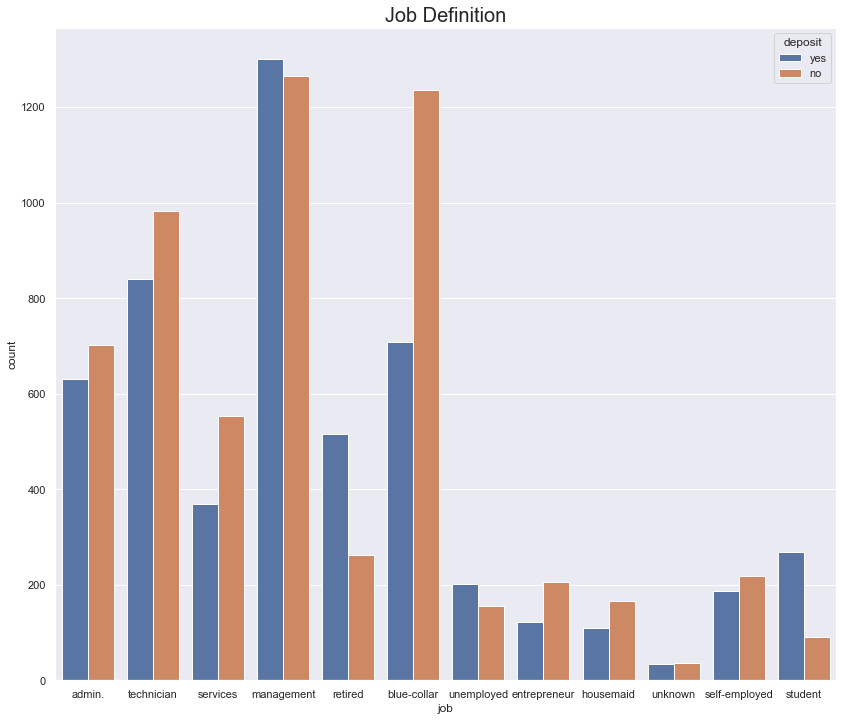

In [6]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(14, 12))
sns.countplot(data=df, x='job', hue='deposit',ax=ax)
plt.title('Job Definition', fontsize=20)
plt.show()

In [69]:
admin_yes=df.loc[((df['job']=='admin.') & (df['deposit']=='yes'))]
admin_no=df.loc[((df['job']=='admin.') & (df['deposit']=='no'))]
print('Admin Conversion Rate:',admin_yes['deposit'].replace('yes',1).sum()/admin_no['deposit'].replace('no',1).sum())
tech_yes=df.loc[((df['job']=='technician') & (df['deposit']=='yes'))]
tech_no=df.loc[((df['job']=='technician') & (df['deposit']=='no'))]
print('Technician Conversion Rate:',tech_yes['deposit'].replace('yes',1).sum()/tech_no['deposit'].replace('no',1).sum())
serv_yes=df.loc[((df['job']=='services') & (df['deposit']=='yes'))]
serv_no=df.loc[((df['job']=='services') & (df['deposit']=='no'))]
print('Services Conversion Rate:',serv_yes['deposit'].replace('yes',1).sum()/serv_no['deposit'].replace('no',1).sum())
man_yes=df.loc[((df['job']=='management') & (df['deposit']=='yes'))]
man_no=df.loc[((df['job']=='management') & (df['deposit']=='no'))]
print('Management Conversion Rate:',man_yes['deposit'].replace('yes',1).sum()/man_no['deposit'].replace('no',1).sum())
ret_yes=df.loc[((df['job']=='retired') & (df['deposit']=='yes'))]
ret_no=df.loc[((df['job']=='retired') & (df['deposit']=='no'))]
print('Retired Conversion Rate:',ret_yes['deposit'].replace('yes',1).sum()/ret_no['deposit'].replace('no',1).sum())
blue_yes=df.loc[((df['job']=='blue-collar') & (df['deposit']=='yes'))]
blue_no=df.loc[((df['job']=='blue-collar') & (df['deposit']=='no'))]
print('Blue-Collar Conversion Rate:',blue_yes['deposit'].replace('yes',1).sum()/blue_no['deposit'].replace('no',1).sum())
unem_yes=df.loc[((df['job']=='unemployed') & (df['deposit']=='yes'))]
unem_no=df.loc[((df['job']=='unemployed') & (df['deposit']=='no'))]
print('Unemployed Conversion Rate:',unem_yes['deposit'].replace('yes',1).sum()/unem_no['deposit'].replace('no',1).sum())
ent_yes=df.loc[((df['job']=='entrepreneur') & (df['deposit']=='yes'))]
ent_no=df.loc[((df['job']=='entrepreneur') & (df['deposit']=='no'))]
print('Entrepreneur Conversion Rate:',ent_yes['deposit'].replace('yes',1).sum()/ent_no['deposit'].replace('no',1).sum())
house_yes=df.loc[((df['job']=='housemaid') & (df['deposit']=='yes'))]
house_no=df.loc[((df['job']=='housemaid') & (df['deposit']=='no'))]
print('Housemaid Conversion Rate:',house_yes['deposit'].replace('yes',1).sum()/house_no['deposit'].replace('no',1).sum())
self_yes=df.loc[((df['job']=='self-employed') & (df['deposit']=='yes'))]
self_no=df.loc[((df['job']=='self-employed') & (df['deposit']=='no'))]
print('Self-Employed Conversion Rate:',self_yes['deposit'].replace('yes',1).sum()/self_no['deposit'].replace('no',1).sum())
student_yes=df.loc[((df['job']=='student') & (df['deposit']=='yes'))]
student_no=df.loc[((df['job']=='student') & (df['deposit']=='no'))]
print('Student Conversion Rate:',student_yes['deposit'].replace('yes',1).sum()/student_no['deposit'].replace('no',1).sum())
unk_yes=df.loc[((df['job']=='unknown') & (df['deposit']=='yes'))]
unk_no=df.loc[((df['job']=='unknown') & (df['deposit']=='no'))]
print('Unknown Status Conversion Rate:',unk_yes['deposit'].replace('yes',1).sum()/unk_no['deposit'].replace('no',1).sum())


Admin Conversion Rate: 0.8975817923186344
Technician Conversion Rate: 0.854526958290946
Services Conversion Rate: 0.6660649819494585
Management Conversion Rate: 1.0284584980237155
Retired Conversion Rate: 1.9694656488549618
Blue-Collar Conversion Rate: 0.5728155339805825
Unemployed Conversion Rate: 1.303225806451613
Entrepreneur Conversion Rate: 0.6
Housemaid Conversion Rate: 0.6606060606060606
Self-Employed Conversion Rate: 0.8577981651376146
Student Conversion Rate: 2.956043956043956
Unknown Status Conversion Rate: 0.9444444444444444


#### Based on their job status large number of our customer are from management background, second largest are blue-collar worker. While Management background has a good conversion rate at 1.02 but the highest conversion are student at 2.9 but among the lowest customer segment.



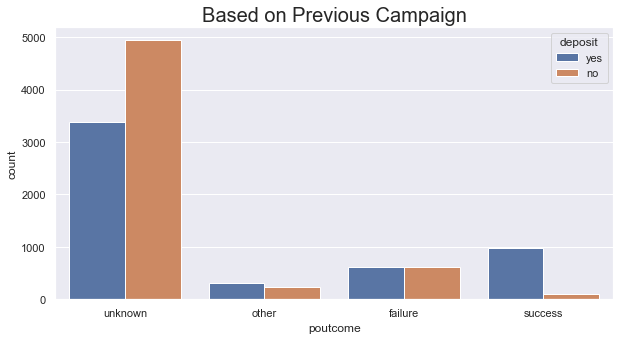

In [12]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='poutcome', hue='deposit',ax=ax)
plt.title('Based on Previous Campaign', fontsize=20)
plt.show()

In [70]:
unk_out_yes=df.loc[((df['poutcome']=='unknown') & (df['deposit']=='yes'))]
unk_out_no=df.loc[((df['poutcome']=='unknown') & (df['deposit']=='no'))]
print('Unknown Status Conversion Rate:',unk_out_yes['deposit'].replace('yes',1).sum()/unk_out_no['deposit'].replace('no',1).sum())
other_yes=df.loc[((df['poutcome']=='other') & (df['deposit']=='yes'))]
other_no=df.loc[((df['poutcome']=='other') & (df['deposit']=='no'))]
print('Other Status Conversion Rate:',other_yes['deposit'].replace('yes',1).sum()/other_no['deposit'].replace('no',1).sum())
fail_yes=df.loc[((df['poutcome']=='failure') & (df['deposit']=='yes'))]
fail_no=df.loc[((df['poutcome']=='failure') & (df['deposit']=='no'))]
print('Failure Conversion Rate:',fail_yes['deposit'].replace('yes',1).sum()/fail_no['deposit'].replace('no',1).sum())
suc_yes=df.loc[((df['poutcome']=='success') & (df['deposit']=='yes'))]
suc_no=df.loc[((df['poutcome']=='success') & (df['deposit']=='no'))]
print('Success Status Conversion Rate:',suc_yes['deposit'].replace('yes',1).sum()/suc_no['deposit'].replace('no',1).sum())

Unknown Status Conversion Rate: 0.6854251012145749
Other Status Conversion Rate: 1.3347826086956522
Failure Conversion Rate: 1.0131147540983607
Success Status Conversion Rate: 10.516129032258064


#### The outcome after previous marketing campaign has a lot of result. But the most signficant is the unknown output with a lot of deposit with low conversion rate at 0.6. We can conclude that customer that already attracted to our campaign are much easy to deposit when we look the Success conversion.

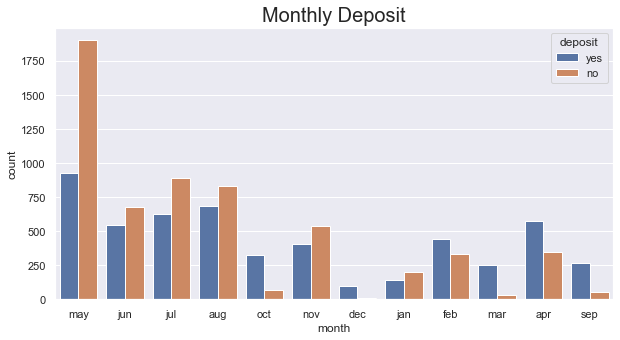

In [13]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='month', hue='deposit',ax=ax)
plt.title('Monthly Deposit', fontsize=20)
plt.show()

In [74]:
jan_yes=df.loc[((df['month']=='jan') & (df['deposit']=='yes'))]
jan_no=df.loc[((df['month']=='jan') & (df['deposit']=='no'))]
print('January Conversion Rate:',jan_yes['deposit'].replace('yes',1).sum()/jan_no['deposit'].replace('no',1).sum())
feb_yes=df.loc[((df['month']=='feb') & (df['deposit']=='yes'))]
feb_no=df.loc[((df['month']=='feb') & (df['deposit']=='no'))]
print('February Conversion Rate:',feb_yes['deposit'].replace('yes',1).sum()/feb_no['deposit'].replace('no',1).sum())
mar_yes=df.loc[((df['month']=='mar') & (df['deposit']=='yes'))]
mar_no=df.loc[((df['month']=='mar') & (df['deposit']=='no'))]
print('March Conversion Rate:',mar_yes['deposit'].replace('yes',1).sum()/mar_no['deposit'].replace('no',1).sum())
apr_yes=df.loc[((df['month']=='apr') & (df['deposit']=='yes'))]
apr_no=df.loc[((df['month']=='apr') & (df['deposit']=='no'))]
print('April Conversion Rate:',apr_yes['deposit'].replace('yes',1).sum()/apr_no['deposit'].replace('no',1).sum())
may_yes=df.loc[((df['month']=='may') & (df['deposit']=='yes'))]
may_no=df.loc[((df['month']=='may') & (df['deposit']=='no'))]
print('May Conversion Rate:',may_yes['deposit'].replace('yes',1).sum()/may_no['deposit'].replace('no',1).sum())
jun_yes=df.loc[((df['month']=='jun') & (df['deposit']=='yes'))]
jun_no=df.loc[((df['month']=='jun') & (df['deposit']=='no'))]
print('June Conversion Rate:',jun_yes['deposit'].replace('yes',1).sum()/jun_no['deposit'].replace('no',1).sum())
jul_yes=df.loc[((df['month']=='jul') & (df['deposit']=='yes'))]
jul_no=df.loc[((df['month']=='jul') & (df['deposit']=='no'))]
print('July Conversion Rate:',jul_yes['deposit'].replace('yes',1).sum()/jul_no['deposit'].replace('no',1).sum())
agt_yes=df.loc[((df['month']=='aug') & (df['deposit']=='yes'))]
agt_no=df.loc[((df['month']=='aug') & (df['deposit']=='no'))]
print('August Conversion Rate:',agt_yes['deposit'].replace('yes',1).sum()/agt_no['deposit'].replace('no',1).sum())
sep_yes=df.loc[((df['month']=='sep') & (df['deposit']=='yes'))]
sep_no=df.loc[((df['month']=='sep') & (df['deposit']=='no'))]
print('September Conversion Rate:',sep_yes['deposit'].replace('yes',1).sum()/sep_no['deposit'].replace('no',1).sum())
oct_yes=df.loc[((df['month']=='oct') & (df['deposit']=='yes'))]
oct_no=df.loc[((df['month']=='oct') & (df['deposit']=='no'))]
print('October Conversion Rate:',oct_yes['deposit'].replace('yes',1).sum()/oct_no['deposit'].replace('no',1).sum())
nov_yes=df.loc[((df['month']=='nov') & (df['deposit']=='yes'))]
nov_no=df.loc[((df['month']=='nov') & (df['deposit']=='no'))]
print('November Conversion Rate:',nov_yes['deposit'].replace('yes',1).sum()/nov_no['deposit'].replace('no',1).sum())
dec_yes=df.loc[((df['month']=='dec') & (df['deposit']=='yes'))]
dec_no=df.loc[((df['month']=='dec') & (df['deposit']=='no'))]
print('December Conversion Rate:',dec_yes['deposit'].replace('yes',1).sum()/dec_no['deposit'].replace('no',1).sum())

January Conversion Rate: 0.7029702970297029
February Conversion Rate: 1.3164179104477611
March Conversion Rate: 8.857142857142858
April Conversion Rate: 1.6676300578034682
May Conversion Rate: 0.48709847288046343
June Conversion Rate: 0.8076923076923077
July Conversion Rate: 0.7068771138669673
August Conversion Rate: 0.8279181708784596
September Conversion Rate: 5.38
October Conversion Rate: 4.681159420289855
November Conversion Rate: 0.7462962962962963
December Conversion Rate: 10.0


#### Based on month most customer attracted at May but the conversion rate is the lowest among many months but still hold the largest deposit. The highest conversion are at December with the lowest deposit.

#### We move to the next insight. We look to on contacting customers duration in seconds. So we can conculde effective marketing while phone-calling. We segregate between calling less than 500 second and more than 500 second.

In [14]:
less_than_500=df.loc[df['duration']<= 500]

In [15]:
more_than_500=df.loc[df['duration']>= 500]

In [16]:
less_than_500_yes=df.loc[((df['duration']<= 500) & (df['deposit']=='yes'))]
less_than_500_no=df.loc[((df['duration']<= 500) & (df['deposit']=='no'))]
print('Less than 500 second Conversion Rate:',less_than_500_yes['deposit'].replace('yes',1).sum()/less_than_500_no['deposit'].replace('no',1).sum())

Less than 500 second Conversion Rate: 0.5594353640416048


In [17]:
more_than_500_yes=df.loc[((df['duration']>= 500) & (df['deposit']=='yes'))]
more_than_500_no=df.loc[((df['duration']>= 500) & (df['deposit']=='no'))]
print('More than 500 second Conversion Rate:',more_than_500_yes['deposit'].replace('yes',1).sum()/more_than_500_no['deposit'].replace('no',1).sum())

More than 500 second Conversion Rate: 4.647657841140529


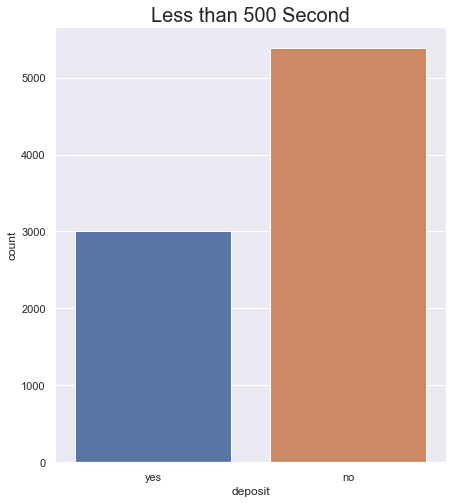

In [18]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(7, 8))
sns.countplot(data=less_than_500, x='deposit',ax=ax)
plt.title('Less than 500 Second', fontsize=20)
plt.show()

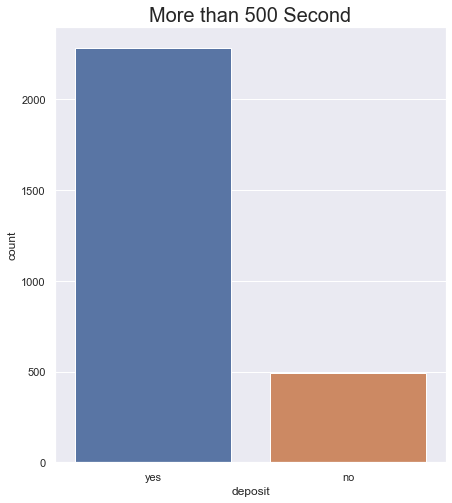

In [19]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(7, 8))
sns.countplot(data=more_than_500, x='deposit',ax=ax)
plt.title('More than 500 Second', fontsize=20)
plt.show()

We can see from the data above duration more than 500 second having a lot of conversion rate than less than 500 duration. But the amount of customer with less than 500 second are more than above 500 second duration. 

After the duration, we move to last analysis from how many contacts that effective for the campaign. We seperate for 1 time, 2 times, 3 times, 4 and more than 4 times.

In [21]:
campaign_1=df.loc[df['campaign']==1]

In [22]:
campaign_2=df.loc[df['campaign']==2]

In [23]:
campaign_3=df.loc[df['campaign']==3]

In [24]:
campaign_more_than_4=df.loc[df['campaign']>= 4]

In [91]:
campaign_1_yes=df.loc[((df['campaign']==1) & (df['deposit']=='yes'))]
campaign_1_no=df.loc[((df['campaign']==1) & (df['deposit']=='no'))]
print('Campaign 1 time Conversion Rate:',campaign_1_yes['deposit'].replace('yes',1).sum()/campaign_1_no['deposit'].replace('no',1).sum())

Campaign 1 time Conversion Rate: 1.1448368350469378


In [92]:
campaign_2_yes=df.loc[((df['campaign']==2) & (df['deposit']=='yes'))]
campaign_2_no=df.loc[((df['campaign']==2) & (df['deposit']=='no'))]
print('Campaign 2 times Conversion Rate:',campaign_2_yes['deposit'].replace('yes',1).sum()/campaign_2_no['deposit'].replace('no',1).sum())

Campaign 2 times Conversion Rate: 0.8610940381069453


In [93]:
campaign_3_yes=df.loc[((df['campaign']==3) & (df['deposit']=='yes'))]
campaign_3_no=df.loc[((df['campaign']==3) & (df['deposit']=='no'))]
print('Campaign 3 times Conversion Rate:',campaign_3_yes['deposit'].replace('yes',1).sum()/campaign_3_no['deposit'].replace('no',1).sum())

Campaign 3 times Conversion Rate: 0.8790896159317212


In [94]:
campaign_4_yes=df.loc[((df['campaign']>= 4) & (df['deposit']=='yes'))]
campaign_4_no=df.loc[((df['campaign']>= 4) & (df['deposit']=='no'))]
print('Campaign more than 4 times Conversion Rate:',campaign_4_yes['deposit'].replace('yes',1).sum()/campaign_4_no['deposit'].replace('no',1).sum())

Campaign more than 4 times Conversion Rate: 0.5428790199081164


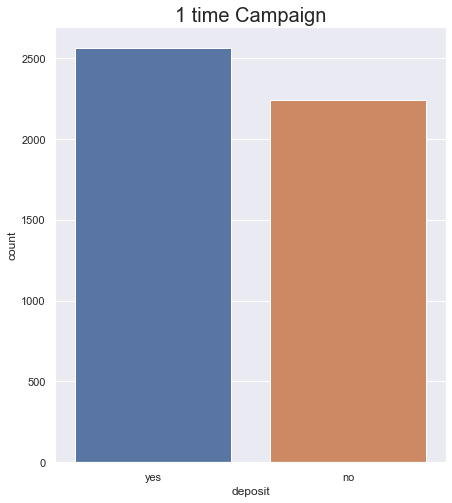

In [25]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(7, 8))
sns.countplot(data=campaign_1, x='deposit',ax=ax)
plt.title('1 time Campaign', fontsize=20)
plt.show()

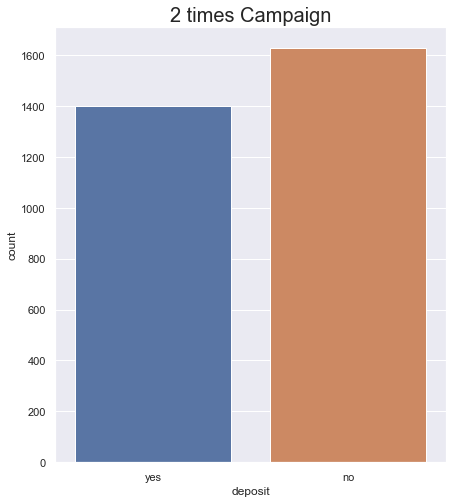

In [26]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(7, 8))
sns.countplot(data=campaign_2, x='deposit',ax=ax)
plt.title('2 times Campaign', fontsize=20)
plt.show()

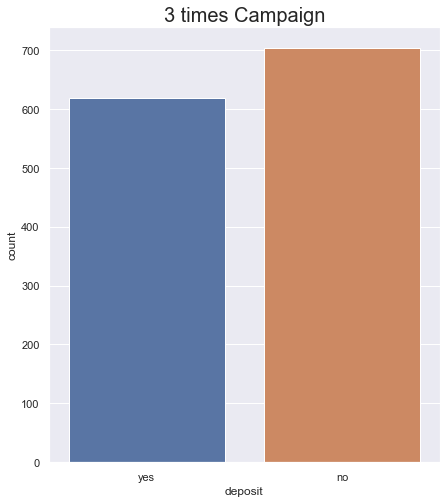

In [27]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(7, 8))
sns.countplot(data=campaign_3, x='deposit',ax=ax)
plt.title('3 times Campaign', fontsize=20)
plt.show()

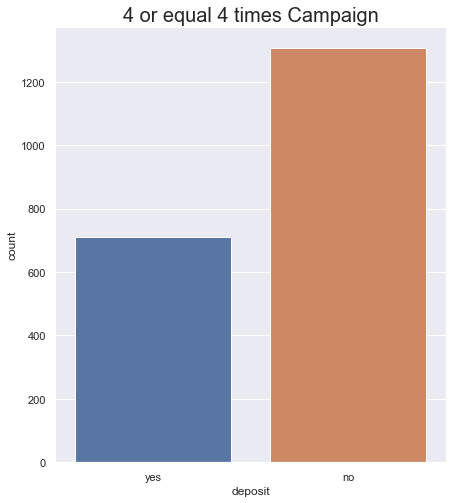

In [28]:
sns.set(style='darkgrid')
fig,ax= plt.subplots(figsize=(7, 8))
sns.countplot(data=campaign_more_than_4, x='deposit',ax=ax)
plt.title('4 or equal 4 times Campaign', fontsize=20)
plt.show()

#### So by the data the most effective campaigns is do it in 1 time. With a lot conversion rate and most of customers are attracted to deposit.

Before we conclude our discovery I want to apply with machine learning model to give more insight which is the most important to effective campaign. First thing to do is to convert alphabetical data into numbers with Label Encoder.

In [29]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == np.number: continue
   
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-29-f3c4f6572fbe>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue


In [30]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


#### Seperate between independent and dependent variables.

In [31]:
from sklearn.model_selection import train_test_split

x=df.drop(['deposit'],axis=1)
y= df['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#### We apply which is the best machine learning model. We train and test the model to choose the right model which not overfitting and underfitting.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

score_train = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")
score_test = cross_val_score(rf, x_test, y_test, cv=10, scoring="accuracy")


print('Random Forest Classifier Train Score:',int(score_train.mean()*100),'%')
print('Random Forest Classifier Test Score:',int(score_test.mean()*100),'%')

Random Forest Classifier Train Score: 84 %
Random Forest Classifier Test Score: 80 %


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred=dt.predict(x_test)

score_train = cross_val_score(dt, x_train, y_train, cv=10, scoring="accuracy")
score_test = cross_val_score(dt, x_test, y_test, cv=10, scoring="accuracy")


print('Decision Tree Classifier Train Score:',int(score_train.mean()*100),'%')
print('Decision Tree Classifier Test Score:',int(score_test.mean()*100),'%')

Decision Tree Classifier Train Score: 77 %
Decision Tree Classifier Test Score: 71 %


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
etc_pred=etc.predict(x_test)

score_train = cross_val_score(etc, x_train, y_train, cv=10, scoring="accuracy")
score_test = cross_val_score(etc, x_test, y_test, cv=10, scoring="accuracy")


print('Extra Trees Classifier Train Score:',int(score_train.mean()*100),'%')
print('Extra Trees Classifier Test Score:',int(score_test.mean()*100),'%')

Extra Trees Classifier Train Score: 84 %
Extra Trees Classifier Test Score: 78 %


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)

score_train = cross_val_score(gbc, x_train, y_train, cv=10, scoring="accuracy")
score_test = cross_val_score(gbc, x_test, y_test, cv=10, scoring="accuracy")


print('Gradient Boosting Classifier Train Score:',int(score_train.mean()*100),'%')
print('Gradient Boosting Classifier Test Score:',int(score_test.mean()*100),'%')

Gradient Boosting Classifier Train Score: 84 %
Gradient Boosting Classifier Test Score: 79 %


#### So after I train and test the model I choose Random Forest Classifier as the right model because the accuracy is high between train and test. And realtivley has the same balance accuracy between both of it. After applying machine learning model I want to put feature importance to get the most important in the campaign.

#### I put it in graph explain what I find. And here it is.

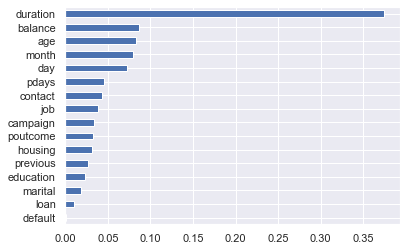

In [42]:
fi= pd.Series(rf.feature_importances_,index=x.columns)
fi.sort_values(ascending=True).plot(kind='barh')
plt.show()

#### We can see duration of phone-calling is the essential part of effective marketing with the high number of importance score. It's based with our EDA when we phone call more than 500 second, conversion rate is higher it's 4.6 which is really effective.



# Conclusion

1. Duration of phone-calling is the most essential to effective marketing campaign especially when we want to boost conversion rate(more than 500 second is mandatory).

2. It's good to attract more customer but high conversion rate make more efficient marketing especially when we find out a lot customer by their characteristic such as management by job,married marital status,secondary education, no default, no loan ,using cellular phone ,unknown result by previous campaign, and in month of May. These characteristic has a lot of volume of customer but has a so so and low conversion rate, so if we can attract them by these charactersitic with much longer duration of phone calling we can make optimum result to make them deposit. (Of course don't forget the rest of characteristic)

3. 1 time campaign much effective rather than more than 1.

# Thank You!